In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('/content/mdl_ihciA.csv')
df.head()

,Qid,CognitiveCat,KnowledgeCat
0,Q001,Evaluate,Procedural
1,Q002,Analyze,Conceptual
2,Q003,Understand,Procedural
3,Q004,Understand,Factual
4,Q005,Create,Conceptual


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Qid           794 non-null    object
 1   CognitiveCat  794 non-null    object
 2   KnowledgeCat  794 non-null    object
dtypes: object(3)
memory usage: 18.7+ KB


In [12]:
df.describe()

,Qid,CognitiveCat,KnowledgeCat
count,794,794,794
unique,794,6,3
top,Q259,Understand,Conceptual
freq,1,464,320


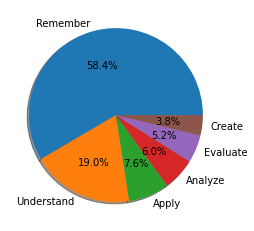

In [13]:
import matplotlib.pyplot as plt
sizes= df['CognitiveCat'].value_counts()
fig1,ax1 = plt.subplots()
ax1.pie(sizes,autopct='%1.1f%%',labels=['Remember','Understand','Apply','Analyze','Evaluate', 'Create'],shadow=True)
plt.show()

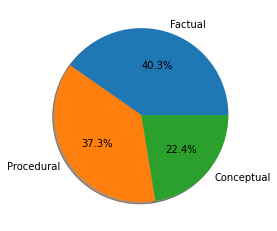

In [14]:
import matplotlib.pyplot as plt
sizes= df['KnowledgeCat'].value_counts()
fig1,ax1 = plt.subplots()
ax1.pie(sizes,autopct='%1.1f%%',labels=['Factual','Procedural','Conceptual'],shadow=True)
plt.show()

In [15]:
data_crosstab = pd.crosstab(df['KnowledgeCat'],
                            df['CognitiveCat'],  
                               margins = False) 
print(data_crosstab)

CognitiveCat  Analyze  Apply  Create  Evaluate  Remember  Understand
KnowledgeCat                                                        
Conceptual         21     11       1         7        31         249
Factual             1      3       0         2        99          73
Procedural         19     46      47        21        21         142


In [ ]:
df = pd.get_dummies(df, columns=['CognitiveCat'], prefix = ['CP'])
df.head()

,Qid,KnowledgeCat,CP_Analyze,CP_Apply,CP_Create,CP_Evaluate,CP_Remember,CP_Understand
0,Q001,Procedural,0,0,0,1,0,0
1,Q002,Conceptual,1,0,0,0,0,0
2,Q003,Procedural,0,0,0,0,0,1
3,Q004,Factual,0,0,0,0,0,1
4,Q005,Conceptual,0,0,1,0,0,0


In [ ]:
df = pd.get_dummies(df, columns=['KnowledgeCat'], prefix = ['Know'])
df.head()

,Qid,CP_Analyze,CP_Apply,CP_Create,CP_Evaluate,CP_Remember,CP_Understand,Know_Conceptual,Know_Factual,Know_Procedural
0,Q001,0,0,0,1,0,0,0,0,1
1,Q002,1,0,0,0,0,0,1,0,0
2,Q003,0,0,0,0,0,1,0,0,1
3,Q004,0,0,0,0,0,1,0,1,0
4,Q005,0,0,1,0,0,0,1,0,0


In [ ]:
df.corr()

,CP_Analyze,CP_Apply,CP_Create,CP_Evaluate,CP_Remember,CP_Understand,Know_Conceptual,Know_Factual,Know_Procedural
CP_Analyze,1.000000,-0.066715,-0.059190,-0.046239,-0.113078,-0.276692,0.051935,-0.111787,0.043729
CP_Apply,-0.066715,1.000000,-0.072524,-0.056655,-0.138551,-0.339023,-0.128054,-0.119412,0.232885
CP_Create,-0.059190,-0.072524,1.000000,-0.050265,-0.122923,-0.300783,-0.197645,-0.136355,0.318090
CP_Evaluate,-0.046239,-0.056655,-0.050265,1.000000,-0.096028,-0.234972,-0.068553,-0.074844,0.134089
CP_Remember,-0.113078,-0.138551,-0.122923,-0.096028,1.000000,-0.574626,-0.195344,0.501339,-0.234231
CP_Understand,-0.276692,-0.339023,-0.300783,-0.234972,-0.574626,1.000000,0.323009,-0.190085,-0.163715
Know_Conceptual,0.051935,-0.128054,-0.197645,-0.068553,-0.195344,0.323009,1.000000,-0.441678,-0.633457
Know_Factual,-0.111787,-0.119412,-0.136355,-0.074844,0.501339,-0.190085,-0.441678,1.000000,-0.414430
Know_Procedural,0.043729,0.232885,0.318090,0.134089,-0.234231,-0.163715,-0.633457,-0.414430,1.000000


In [20]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table


stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Cognitive skills and Knowledge dimensions are independent(reject H0)')
else:
	print('Cognitive skills and Knowledge dimensions are dependent. (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Cognitive skills and Knowledge dimensions are independent (reject H0)')
else:
	print('Cognitive skills and Knowledge dimensions are dependent. (fail to reject H0)')


dof=10
[[ 16.52392947  24.1813602   19.34508816  12.0906801   60.85642317
  187.00251889]
 [  9.19143577  13.45088161  10.76070529   6.72544081  33.85138539
  104.02015113]
 [ 15.28463476  22.36775819  17.89420655  11.18387909  56.29219144
  172.97732997]]
probability=0.950, critical=18.307, stat=336.776
Cognitive skills and Knowledge dimensions are independent(reject H0)
significance=0.050, p=0.000
Cognitive skills and Knowledge dimensions are independent (reject H0)
